In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd

from geopy.geocoders import Nominatim
import time


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Basanta\AppData\Roaming

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\Users\Basanta\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start
    self.io_loop.start()
  File "C:\Users\Basanta\AppData\Roaming

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.6 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



In [2]:

# Make sure logging is off to reduce noise
ox.settings.log_console = False

# Define tags
tags = {"amenity": "fast_food", "name": ["McDonald's", "KFC", "Subway"]}

# Get fast food places in Sydney
gdf = ox.features_from_place("Sydney, Australia", tags=tags)








In [3]:
columns_to_keep = ['name', 'geometry','brand','branch','addr:street']
df=gdf[columns_to_keep]


In [4]:
# # Visualize fast food locations on an interactive map

# df.explore(
#     column="name",  # Color points by name
#     tooltip=["name", "brand", "addr:street"],  # Show info on hover
#     marker_kwds={"radius": 6},  # Marker size
#     style_kwds={"fillOpacity": 0.7},
#     height=500,
#     width=800
# )

In [5]:
df.head()
brand="McDonald's"

In [6]:
df['brand'].unique().tolist()


["McDonald's",
 nan,
 'Oporto',
 'KFC',
 'Subway',
 "Domino's",
 'Pepper Lunch',
 "Hungry Jack's",
 'Crust',
 'Krispy Kreme',
 'Red Rooster',
 "Betty's Burgers",
 "Domino's Pizza",
 'Guzman y Gomez',
 'Donut King',
 'Fishbowl',
 'Hungry Jacks',
 'Zambrero',
 "Grill'd",
 'El Jannah',
 'Schnitz',
 'Sumo Salad',
 'Soul Origin',
 "Roll'd",
 'Little Caesars',
 'Taco Bell',
 'Pizza Hut',
 'Five Guys',
 'Lord of the Fries',
 'Chicken Treat',
 'Potato Corner',
 'Saravanaa Bhavan',
 'I Love Pizza',
 'Pizza Inn',
 "Frango's",
 'Atlantic Fish & Chips',
 'Cinnabon']

In [7]:
test_filtered = df[df['brand'] == brand]
test_filtered.head()

name                     geometry       brand  \
element id                                                               
node    19127275   McDonald's  POINT (150.87202 -33.95549)  McDonald's   
        251268009  McDonald's   POINT (151.0015 -33.77399)  McDonald's   
        313691857  McDonald's   POINT (151.13063 -33.7835)  McDonald's   
        339290462  McDonald's  POINT (150.90315 -33.73001)  McDonald's   
        417231584  McDonald's     POINT (151.122 -33.9526)  McDonald's   

                     branch                       addr:street  
element id                                                     
node    19127275   Prestons  Cnr Camden Valley Way & Ash Road  
        251268009       NaN                               NaN  
        313691857       NaN                               NaN  
        339290462       NaN                               NaN  
        417231584       NaN                       Forest Road

In [8]:
# Step 1: Reproject to a projected CRS (meters) if needed
if test_filtered.crs.is_geographic:
    test_filtered = test_filtered.to_crs(epsg=3857)

# Step 2: Calculate centroids and store in a new column
test_filtered["geometry_centroid"] = test_filtered.geometry.centroid

# Optional Step 3: Reproject centroids back to lat/lon (EPSG:4326)
test_filtered["geometry_centroid_latlon"] = (
    test_filtered["geometry_centroid"].to_crs(epsg=4326)
)

In [9]:
sa2_gdf = gpd.read_file("shape_files/SA2_2021_AUST_SHP_GDA2020/SA2_2021_AUST_GDA2020.shp")





sa2_nsw = sa2_gdf[sa2_gdf['STE_NAME21'] == 'New South Wales']

sa2 = sa2_nsw[sa2_nsw['GCC_NAME21'] == 'Greater Sydney']


In [10]:
sa2_nsw['SA3_NAME21'].unique().tolist()



['Queanbeyan',
 'Snowy Mountains',
 'South Coast',
 'Goulburn - Mulwaree',
 'Young - Yass',
 'Gosford',
 'Wyong',
 'Bathurst',
 'Lachlan Valley',
 'Lithgow - Mudgee',
 'Orange',
 'Clarence Valley',
 'Coffs Harbour',
 'Bourke - Cobar - Coonamble',
 'Broken Hill and Far West',
 'Dubbo',
 'Lower Hunter',
 'Maitland',
 'Port Stephens',
 'Upper Hunter',
 'Dapto - Port Kembla',
 'Illawarra Catchment Reserve',
 'Kiama - Shellharbour',
 'Wollongong',
 'Great Lakes',
 'Kempsey - Nambucca',
 'Lord Howe Island',
 'Port Macquarie',
 'Taree - Gloucester',
 'Albury',
 'Lower Murray',
 'Upper Murray exc. Albury',
 'Armidale',
 'Inverell - Tenterfield',
 'Moree - Narrabri',
 'Tamworth - Gunnedah',
 'Lake Macquarie - East',
 'Lake Macquarie - West',
 'Newcastle',
 'Richmond Valley - Coastal',
 'Richmond Valley - Hinterland',
 'Tweed Valley',
 'Griffith - Murrumbidgee (West)',
 'Tumut - Tumbarumba',
 'Wagga Wagga',
 'Shoalhaven',
 'Southern Highlands',
 'Baulkham Hills',
 'Dural - Wisemans Ferry',
 'Haw

In [11]:
# sa2.explore(
#     column="SA2_NAME21",  # Color points by name
#     marker_kwds={"radius": 6},  # Marker size
#     style_kwds={"fillOpacity": 0.7},
#     height=500,
#     width=800
# )

In [12]:
census_data = pd.read_csv('shape_files/2021Census_G01_NSW_SA2.csv')
census_data.head()

,SA2_CODE_2021,Tot_P_M,Tot_P_F,Tot_P_P,Age_0_4_yr_M,Age_0_4_yr_F,Age_0_4_yr_P,Age_5_14_yr_M,Age_5_14_yr_F,Age_5_14_yr_P,...,High_yr_schl_comp_Yr_8_belw_P,High_yr_schl_comp_D_n_g_sch_M,High_yr_schl_comp_D_n_g_sch_F,High_yr_schl_comp_D_n_g_sch_P,Count_psns_occ_priv_dwgs_M,Count_psns_occ_priv_dwgs_F,Count_psns_occ_priv_dwgs_P,Count_Persons_other_dwgs_M,Count_Persons_other_dwgs_F,Count_Persons_other_dwgs_P
0,101021007,2234,2117,4343,111,98,207,278,210,487,...,103,5,10,14,1979,1902,3878,288,251,535
1,101021008,4264,4255,8517,276,252,526,595,495,1088,...,366,21,27,43,3989,3961,7950,240,220,460
2,101021009,5704,5638,11342,318,349,669,551,516,1067,...,410,35,52,83,5264,5143,10410,476,467,943
3,101021010,2647,2440,5085,163,164,319,253,216,469,...,116,10,12,27,2462,2344,4800,188,111,302
4,101021012,6331,6413,12744,416,421,835,984,896,1878,...,258,11,0,18,6079,6188,12260,175,187,358


In [13]:
sa2=sa2[['SA2_CODE21', 'SA2_NAME21', 'geometry']]
census = census_data[['SA2_CODE_2021', 'Tot_P_P']]
census['SA2_CODE21']= census['SA2_CODE_2021'].astype(str)

sa2 = sa2.merge(census, on='SA2_CODE21', how='left')
sa2.head()


C:\Users\Basanta\AppData\Local\Temp\ipykernel_4560\1885643769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census['SA2_CODE21']= census['SA2_CODE_2021'].astype(str)


,SA2_CODE21,SA2_NAME21,geometry,SA2_CODE_2021,Tot_P_P
0,102011028,Avoca Beach - Copacabana,"POLYGON ((151.41373 -33.46558, 151.41362 -33.4...",102011028,7513
1,102011029,Box Head - MacMasters Beach,"POLYGON ((151.37484 -33.50052, 151.37507 -33.5...",102011029,11042
2,102011030,Calga - Kulnura,"MULTIPOLYGON (((151.20449 -33.5328, 151.20448 ...",102011030,4716
3,102011031,Erina - Green Point,"POLYGON ((151.37194 -33.43698, 151.37288 -33.4...",102011031,14758
4,102011032,Gosford - Springfield,"POLYGON ((151.32349 -33.42779, 151.32342 -33.4...",102011032,21204


In [14]:
# Convert to projected CRS (e.g., Australian Albers EPSG:3577)
sa2 = sa2.to_crs(epsg=3577)

# Calculate area in square kilometers
sa2['area_km2'] = sa2['geometry'].area / 1e6
sa2['pop_density'] = sa2['Tot_P_P'] / sa2['area_km2']



In [15]:
# Step 0: Make sure both GeoDataFrames are in the same projected CRS
if test_filtered.crs != sa2.crs:
    sa2 = sa2.to_crs(test_filtered.crs)

# Step 1: Define function to get closest polygon (row) from sa2
def get_nearest_suburb(point, suburbs_gdf):
    distances = suburbs_gdf.geometry.distance(point)
    return suburbs_gdf.loc[distances.idxmin()]

# Step 2: Apply the function to each centroid in test_filtered
# You can choose what attribute to extract (e.g., 'suburb_name', 'LGA_CODE', etc.)
test_filtered['nearest_suburb'] = test_filtered['geometry_centroid'].apply(
    lambda pt: get_nearest_suburb(pt, sa2)['SA2_NAME21']
)


In [16]:
suburb_list=sa2
fast_food=test_filtered[['name','geometry','nearest_suburb','geometry_centroid']]


In [17]:
# Step 1: Count how many times each suburb appears
suburb_counts = fast_food["nearest_suburb"].value_counts().reset_index()

# Step 2: Rename columns for clarity
suburb_counts.columns = ["suburb", "fast_food_count"]

# View result


In [18]:
suburb_list = suburb_list.merge(suburb_counts, left_on='SA2_NAME21', right_on='suburb', how="left")

# Step 3: Fill missing counts with 0 (for suburbs with no fast food matches)
suburb_list["fast_food_count"] = suburb_list["fast_food_count"].fillna(0).astype(int)

C:\Users\Basanta\AppData\Roaming\Python\Python312\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


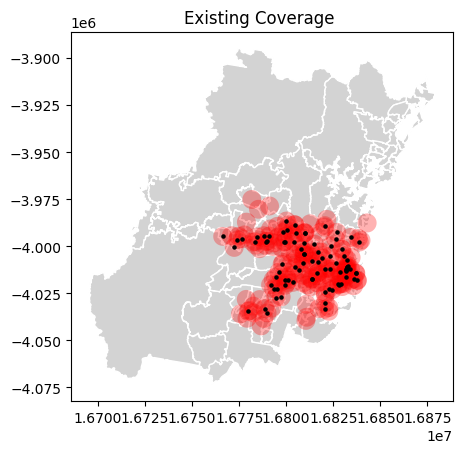

In [19]:
import matplotlib.pyplot as plt

# Buffer around existing fast food locations (5 km)
fast_food["buffer"] = fast_food.geometry.buffer(5000)

# Plot existing fast food locations and buffers
ax = suburb_list.plot(color='lightgrey', edgecolor='white')
fast_food.set_geometry("buffer").plot(ax=ax, color='red', alpha=0.3)
fast_food.set_geometry("geometry").plot(ax=ax, color='black', markersize=5)

plt.title("Existing Coverage ")
plt.show()

In [20]:
import geopandas as gpd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Project both to the same projected CRS (for distance accuracy)
suburb_list_proj = suburb_list.to_crs(epsg=3857).copy()
fast_food = fast_food.to_crs(suburb_list_proj.crs)

# Step 2: Calculate centroid for each SA2 area
suburb_list_proj['centroid'] = suburb_list_proj.geometry.centroid

# Step 3: Calculate minimum distance from each centroid to existing fast food venues
suburb_list_proj['min_dist_to_fastfood_km'] = suburb_list_proj['centroid'].apply(
    lambda x: fast_food.distance(x).min() / 1000  # convert to kilometers
)

# Step 2: Calculate area in square kilometers
suburb_list_proj.loc[:, 'area_km2'] = suburb_list_proj['geometry'].area / 1_000_000

# Step 3: Calculate population density
suburb_list_proj.loc[:, 'pop_density'] = suburb_list_proj['Tot_P_P'] / suburb_list_proj['area_km2']


# Step 6: Get top 10 suggested SA2 areas


# Show results


In [ ]:
subset = suburb_list[suburb_list['fast_food_count'] == 1]

# Summary stats for pop_density
stats = suburb_list['pop_density'].describe()  # includes count, mean, std, min, 25%, 50%, 75%, max

print(stats)

count      104.000000
mean      3233.577190
std       2875.135543
min          0.401748
25%       1542.168763
50%       2693.614843
75%       3925.666550
max      15681.551921
Name: pop_density, dtype: float64


In [22]:
# Step 4: Normalize both metrics (density and distance)





new_list = suburb_list_proj


scaler = MinMaxScaler()
new_list[['norm_density', 'norm_dist']] = scaler.fit_transform(
    new_list[['pop_density', 'min_dist_to_fastfood_km']]
)

# Step 5: Create a composite score (weights: 0.7 for density, 0.3 for distance)
new_list['location_score'] = (
    new_list['norm_density'] * 0.7 + new_list['norm_dist'] * 0.3
)


In [29]:
stats = new_list['location_score'].describe()  # includes count, mean, std, min, 25%, 50%, 75%, max
print(stats)

count    373.000000
mean       0.145021
std        0.103967
min        0.002081
25%        0.074823
50%        0.126254
75%        0.181025
max        0.700000
Name: location_score, dtype: float64


In [23]:
POP_DENSITY_THRESHOLD = 1000
DISTANCE_TO_MCD_THRESHOLD_KM = 3.0

# Step 2: Filter the suburbs that meet both conditions
candidate_suburbs = new_list[
    (new_list['pop_density'] > POP_DENSITY_THRESHOLD) &
    (new_list['min_dist_to_fastfood_km'] > DISTANCE_TO_MCD_THRESHOLD_KM)
]

# Step 3: Preview the top candidates
top_areas = candidate_suburbs.sort_values(by='pop_density', ascending=False).head(3)
print(top_areas[['SA2_NAME21', 'pop_density', 'min_dist_to_fastfood_km', 'location_score','fast_food_count']])


                      SA2_NAME21  pop_density  min_dist_to_fastfood_km  \
168                      Balmain  4152.038683                 3.064693   
105                Dover Heights  4089.302797                 4.410033   
228  Narrabeen - Wheeler Heights  2557.691095                 3.971565   

     location_score  fast_food_count  
168        0.240398                0  
105        0.242014                0  
228        0.155758                0  


In [24]:
new_list.head()

,SA2_CODE21,SA2_NAME21,geometry,SA2_CODE_2021,Tot_P_P,area_km2,pop_density,suburb,fast_food_count,centroid,min_dist_to_fastfood_km,norm_density,norm_dist,location_score
0,102011028,Avoca Beach - Copacabana,"POLYGON ((16855299.052 -3957268.005, 16855286....",102011028,7513,9.276612,809.886182,NaN,0,POINT (16857130.241 -3958579.617),32.221186,0.063907,0.403900,0.165905
1,102011029,Box Head - MacMasters Beach,"POLYGON ((16850969.591 -3961931.321, 16850994....",102011029,11042,46.265510,238.665907,NaN,0,POINT (16852074.144 -3963000.079),26.168974,0.018833,0.327710,0.111496
2,102011030,Calga - Kulnura,"MULTIPOLYGON (((16832006.265 -3966241.68, 1683...",102011030,4716,1103.259996,4.274604,NaN,0,POINT (16828759.908 -3940508.464),45.750197,0.000337,0.574212,0.172500
3,102011031,Erina - Green Point,"POLYGON ((16850646.24 -3953451.994, 16850751.4...",102011031,14758,48.641239,303.405098,NaN,0,POINT (16854048.087 -3951620.041),37.589944,0.023941,0.471485,0.158204
4,102011032,Gosford - Springfield,"POLYGON ((16845252.841 -3952225.631, 16845245....",102011032,21204,24.343350,871.038699,NaN,0,POINT (16847970.039 -3951887.042),36.005282,0.068732,0.451537,0.183573


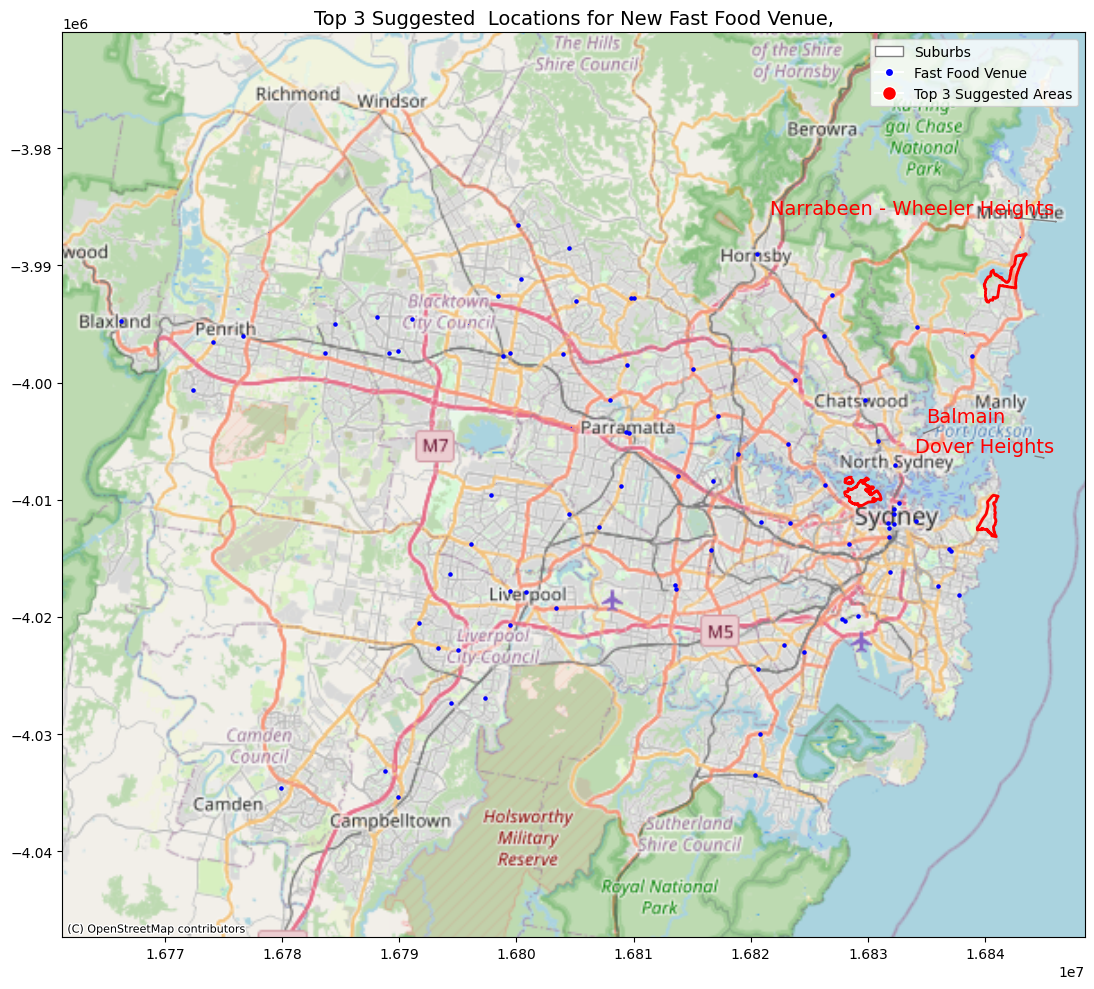

In [25]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
# If running in a Jupyter notebook, use the following to install adjustText:
from adjustText import adjust_text


# Step 1: Get top 3 recommended SA2 areas

# Step 2: Reproject all data to EPSG:3857
fast_food_wm = fast_food.to_crs(epsg=3857)
suburb_list_wm = suburb_list.to_crs(epsg=3857)
top_areas_wm = top_areas.to_crs(epsg=3857)

# Step 3: Create combined GeoDataFrame to compute zoom bounds
combined = pd.concat([fast_food_wm[['geometry']], top_areas_wm[['geometry']]], ignore_index=True)


minx, miny, maxx, maxy = combined.total_bounds
zoom_margin = 5000  # 5 km
xlim = (minx - zoom_margin, maxx + zoom_margin)
ylim = (miny - zoom_margin, maxy + zoom_margin)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all suburbs
# suburb_list_wm.plot(ax=ax, facecolor='white', edgecolor='grey', linewidth=0.5)

# Plot fast food venues
fast_food_wm.plot(ax=ax, color='blue', markersize=5)

# Plot top 3 suggested SA2 locations
top_areas.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Annotate each top area with its name
texts = []
for idx, row in top_areas.iterrows():
    texts.append(
        plt.text(
            row.geometry.centroid.x + 5000,  # shift right
            row.geometry.centroid.y + 5000,  # shift up
            row['SA2_NAME21'],
            fontsize=14, color='red'
        )
    )
    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Add basemap
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Legend
legend_elements = [
    Patch(facecolor='white', edgecolor='grey', label='Suburbs'),
    Line2D([0], [0], marker='o', color='w', label='Fast Food Venue', markerfacecolor='blue', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Top 3 Suggested Areas', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

# Title
ax.set_title("Top 3 Suggested  Locations for New Fast Food Venue,", fontsize=14)
plt.tight_layout()
plt.show()


In [ ]:
#Supervised Learning (Classification/Regression)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import seaborn as sns
new_list[brand] = (new_list['fast_food_count'] > 0).astype(int)

# ✅ Step 3: Feature selection
features = [
    'pop_density',
    'min_dist_to_fastfood_km',
    'Tot_P_P'  # Total population
]
X = new_list[features].fillna(0)
y = new_list['has_mcdonald']

# ✅ Step 4: Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Step 5: Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ✅ Step 6: Evaluation
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Optional: Feature Importance
importances = model.feature_importances_
for f, imp in zip(features, importances):
    print(f"Feature: {f}, Importance: {imp:.4f}")

# ✅ Step 7: Predict on unserved suburbs
unserved = new_list[new_list['has_mcdonald'] == 0].copy()
X_unserved = unserved[features].fillna(0)

unserved['predicted_prob'] = model.predict_proba(X_unserved)[:, 1]



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        48
           1       0.89      0.59      0.71        27

    accuracy                           0.83        75
   macro avg       0.85      0.78      0.79        75
weighted avg       0.84      0.83      0.82        75

Feature: pop_density, Importance: 0.2543
Feature: min_dist_to_fastfood_km, Importance: 0.4964
Feature: Tot_P_P, Importance: 0.2493


In [28]:
# ✅ Step 8: Get top 10 candidates
POP_DENSITY_THRESHOLD = 1000
DISTANCE_TO_MCD_THRESHOLD_KM = 5.0
new_unserved = unserved.copy()

# Step 2: Filter the suburbs that meet both conditions
# threshold = new_unserved[
#     (new_unserved['pop_density'] > POP_DENSITY_THRESHOLD) &
#     (new_unserved['min_dist_to_fastfood_km'] > DISTANCE_TO_MCD_THRESHOLD_KM)
# ]
threshold=new_unserved.copy()

top_areas = threshold.sort_values('predicted_prob', ascending=False).head(3)
print("\nTop Suburbs for New McDonald's:\n")
print(top_areas[['SA2_NAME21', 'pop_density','fast_food_count', 'min_dist_to_fastfood_km', 'predicted_prob']])



Top Suburbs for New McDonald's:

                       SA2_NAME21  pop_density  fast_food_count  \
40              Kellyville - East  2130.496566                0   
127             Yagoona - Birrong  2779.157301                0   
51   Blacktown (North) - Marayong  1922.529544                0   

     min_dist_to_fastfood_km  predicted_prob  
40                  1.251944            0.58  
127                 1.423273            0.55  
51                  0.966626            0.42  


In [ ]:

# Step 1: Get top 3 recommended SA2 areas

# Step 2: Reproject all data to EPSG:3857
fast_food_wm = fast_food.to_crs(epsg=3857)
suburb_list_wm = suburb_list.to_crs(epsg=3857)
top_areas_wm = top_areas.to_crs(epsg=3857)

# Step 3: Create combined GeoDataFrame to compute zoom bounds
combined = pd.concat([fast_food_wm[['geometry']], top_areas_wm[['geometry']]], ignore_index=True)


minx, miny, maxx, maxy = combined.total_bounds
zoom_margin = 5000  # 5 km
xlim = (minx - zoom_margin, maxx + zoom_margin)
ylim = (miny - zoom_margin, maxy + zoom_margin)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all suburbs
# suburb_list_wm.plot(ax=ax, facecolor='white', edgecolor='grey', linewidth=0.5)

# Plot fast food venues
fast_food_wm.plot(ax=ax, color='blue', markersize=5)

# Plot top 3 suggested SA2 locations
top_areas.plot(ax=ax, edgecolor='red', facecolor='none', linewidth=2)

# Annotate each top area with its name
texts = []
for idx, row in top_areas.iterrows():
    texts.append(
        plt.text(
            row.geometry.centroid.x + 5000,  # shift right
            row.geometry.centroid.y + 5000,  # shift up
            row['SA2_NAME21'],
            fontsize=14, color='red'
        )
    )
    
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Add basemap
cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Legend
legend_elements = [
    Patch(facecolor='white', edgecolor='grey', label='Suburbs'),
    Line2D([0], [0], marker='o', color='w', label='Fast Food Venue', markerfacecolor='blue', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Top 3 Suggested Areas', markerfacecolor='red', markersize=10)
]
ax.legend(handles=legend_elements)

# Title
ax.set_title("Top 3 Suggested  Locations for New Fast Food Venue,", fontsize=14)
plt.tight_layout()
plt.show()
